#####  Parte 2 de 4
#### Ingeniero en Sistemas: Erick J. Pineda Amézquita  
Correo de contacto: epineda.amezquita@gmail.com  
github: https://github.com/epinedaWorks/

Ejercicios basados en el material de apoyo de DataCamp  
https://campus.datacamp.com/courses/image-processing-in-python/  

Las imagenes de ejemplo se encuentran en el directorio "imagenes", se hace referencia por medio de **./imagenes/**  
Si se desea, por facilidad, pueden colocarse en el mismo directorio donde se encuentra el arhivo python o notebook ipynb


# Contornos, ecualización de imágenes, rotación, cambio de tamaño, Morfología (erosión, dilatación)


## Procesamiento de imagenes -- Requisitos

Para los siguientes ejemplos, se va a utilizar la herramienta de SCIKIT IMAGE.  
Se requiere instalar dicha librería para hacer uso de todas las funciones que provee la herramienta.  
Para instalar en Windows se requiere acceder a la consola de comandos en modo Administrador y ejecutar la siguiente instrucción:  


**$ pip install scikit-image**  

Si no funciona, probar con:   

**$ conda install -c conda-forge scikit-image**  

No esta de mas realizar un test de los paquetes que se requieren, ya sea antes o después de la instalación de scikit-image por medio de las siguientes instrucciones:  

**$ pytest --pyargs skimage**

Fuente:  
https://scikit-image.org/docs/stable/install.html  
  
**Como primer paso: Ejecutar las siguientes lineas para saber si todo está correcto, si no funciona, revisar instalación**


In [1]:
# Import the modules from skimage
from skimage import data, color

import matplotlib.pyplot as plt
import numpy as np
import cv2


## Ejemplo 1, Contornos por medio del operador Sobel

Comenzamos por importar la librería, si la siguiente instrucción muestra error, será necesario revisar la instalación de scikit image.

Se crea un metodo que va a leer las imagenes por medio de matplotlib.

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

    

Se importa la imagen local y se aplican conversiones de color.

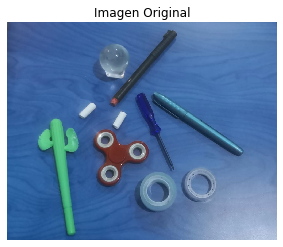

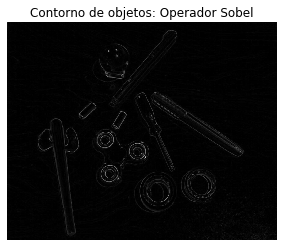

In [3]:
# Import the filters module and sobel function
from skimage.filters import sobel

imgName = "./imagenes/lapiceros.JPG"    
imgLapiceros = cv2.imread(imgName)

# Make the image grayscale
imgLapicerosToGray= color.rgb2gray(imgLapiceros)

# Apply edge detection filter
imgAplicarSobel = sobel(imgLapicerosToGray)

# Show original and resulting image to compare
show_image(imgLapiceros, "Imagen Original")
show_image(imgAplicarSobel, "Contorno de objetos: Operador Sobel")


Se crea una función de comparación para dos imagenes:

In [4]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
  sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')


### Filtro Gaussiano para reducir ruido o nitidez

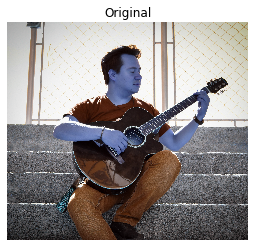

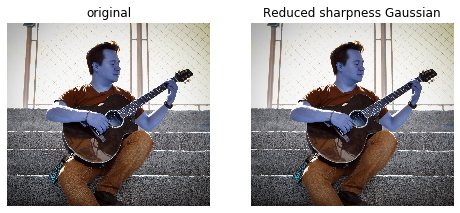

In [5]:
# Import Gaussian filter 
from skimage.filters import gaussian

imgName = "./imagenes/guitarrista.JPG"    
imgGuitarrista = cv2.imread(imgName)
#imgGuitarrista = cv2.cvtColor(imgGuitarrista2, cv2.COLOR_BGR2RGB)

# Apply filter
gaussian_image = gaussian(imgGuitarrista,multichannel=True)

# Show original and resulting image to compare
show_image(imgGuitarrista, "Original")
plot_comparison(imgGuitarrista, gaussian_image, "Reduced sharpness Gaussian")

## Manipulación del contraste:
Existen diferentes formas de modificar el contraste, una de las mas comunes es por medio del histograma de una imágen ya que permite utilizar técnicas de probabilidad, para dicho método existen 3 divisiones:  
+ Ecualización de Histograma estándar:  
Utiliza valores que se presentan en todo el histograma. El contraste se encuentra operantdo el máximo menos el mínimo.  
Por ejemplo, si el valor mínimo es 150 y el máximo 251, esos valores tomará, no precesimante el valor 0 y el valor 255, depende de la imágen. Por lo tanto el contraste será: 251-150 = 101
+ Ecualización de Histograma adaptativo:  
Utiliza métodos dinámicos para encontrar un contraste no sobreexpuesto, se utiliza un parámetro normalizado, entre 0 y 1 para asignar la medida de contraste.
+ Contraste de ecualización de histograma adaptativo limitado (CLAHE)
Hibrido de los casos anteriores.



### Ecualizacón por medio del  Meétodo Estándar de histograma

Para este ejemplo se han colocado 3 diferentes imágenes.  
Queda pendiente resolver la correcta visualización de los colores RGB.

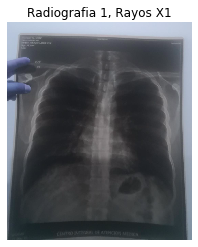

C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


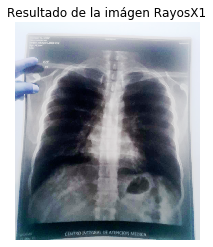

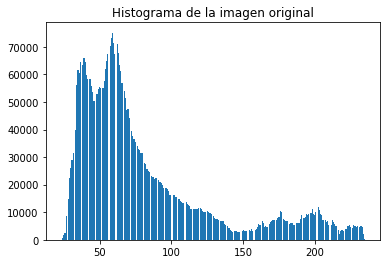

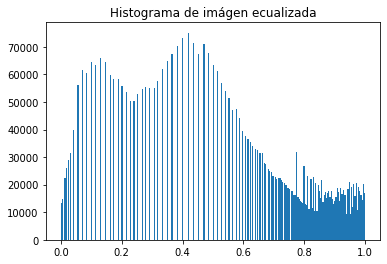

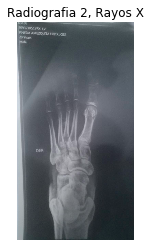

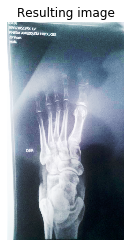

Histograma: 


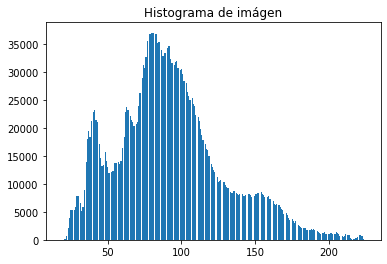

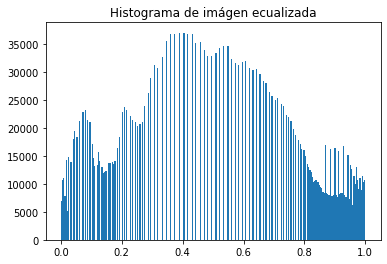

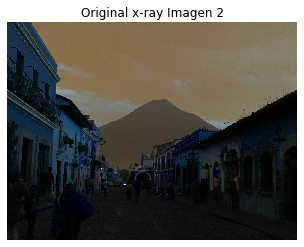

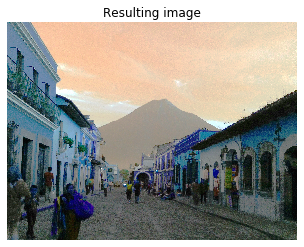

Histograma: 


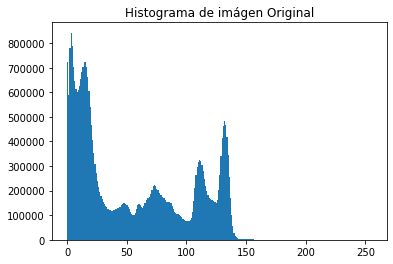

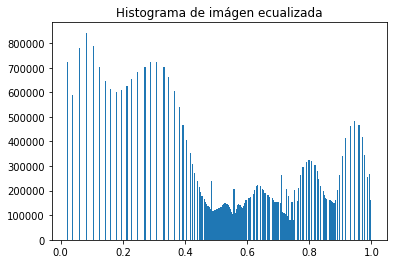

In [6]:
from skimage import exposure

imgName = "./imagenes/radio1.JPG"    
imgRadio1 = cv2.imread(imgName)

imgName2 = "./imagenes/radio2.JPG"    
imgRadio2 = cv2.imread(imgName2)

imgName3 = "./imagenes/volcanGuatemala.JPG"    
imgVolcanGuatemala = cv2.imread(imgName3)
#imgVolcanGuatemala = cv2.cvtColor(imgVolcanGuatemala2, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
show_image(imgRadio1, 'Radiografia 1, Rayos X1')

# Modificación del contraste por medio del método "exposure"
imgRadio1Equalizar =  exposure.equalize_hist(imgRadio1)

# Mostrar los resulados de la ecualización.
show_image(imgRadio1Equalizar, 'Resultado de la imágen RayosX1')

## Mostrar ambos histogramas
plt.title('Histograma de la imagen original')
plt.hist(imgRadio1.ravel(), bins=256)
plt.show()

plt.title('Histograma de imágen ecualizada')
plt.hist(imgRadio1Equalizar.ravel(), bins=256)
plt.show()


######## Se repite, obviar optimización para crear método ###############

# Mostrar la imagen original
show_image(imgRadio2, 'Radiografia 2, Rayos X')

# Modificación del contraste por medio del método "exposure"
imgRadio2Equalizar =  exposure.equalize_hist(imgRadio2)

# Mostrar los resulados de la ecualización.
show_image(imgRadio2Equalizar, 'Resulting image')

## Mostrar ambos histogramas
plt.title('Histograma de imágen')
print("Histograma: ")
plt.hist(imgRadio2.ravel(), bins=256)
plt.show()

plt.title('Histograma de imágen ecualizada')
plt.hist(imgRadio2Equalizar.ravel(), bins=256)
plt.show()


######## Se repite otra vez, obviar optimización para crear método ###############

# Mostrar la imagen original
show_image(imgVolcanGuatemala, 'Original x-ray Imagen 2')

# Modificación del contraste por medio del método "exposure"
imgVolcanGuatemalaEqualizar =  exposure.equalize_hist(imgVolcanGuatemala)

# Mostrar los resulados de la ecualización.
show_image(imgVolcanGuatemalaEqualizar, 'Resulting image')

## Mostrar ambos histogramas
plt.title('Histograma de imágen Original')
print("Histograma: ")
plt.hist(imgVolcanGuatemala.ravel(), bins=256)
plt.show()

plt.title('Histograma de imágen ecualizada')
plt.hist(imgVolcanGuatemalaEqualizar.ravel(), bins=256)
plt.show()








## Ecualización por el metodo de histograma adaptativo
Según los ejemplos realizados, éste metodo funciona bastante bien para imagenes oscuras, de preferencia con poco color.
Entiendo que toma un conjunto de histogramas de la imagen de ahi saca valores para modificar el contraste.
Mientras mas alto el valor, que va entre 0 y 1, mas alto será el contraste

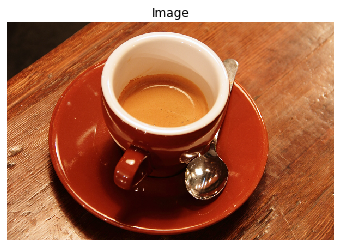

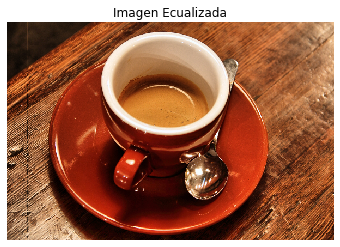

In [7]:
# Import the necessary modules
from skimage import data, exposure
import cv2

# Load the image from the library DATA
imgDesdeLibreriaData = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(imgDesdeLibreriaData, clip_limit=0.01)

# Compare the original image to the equalized
show_image(imgDesdeLibreriaData)
show_image(adapthist_eq_image, 'Imagen Ecualizada')

# Error en los colores :(
He observado que los colores de las imagenes no se muestran bien, tengo la sospecha que al utilizar CV2 y otra herramienta como skimage, hay un conflicto entre la lectura de imágenes.  
Analizando los tipos de datos que tienen al usar CV2, observar que se tienen los mismos, tanto el tipo con las dimensiones coinciden :S  
Queda pendiente saber porqué el color no se mira como en la foto real.

In [8]:
print("Tipo de dato de la imagen de la libreria data: ",type(imgDesdeLibreriaData))
print("Tipo de dato de la imagen de directorio local: ",type(imgGuitarrista))

print("Dimensiones de la imagen de data",imgDesdeLibreriaData.shape)
print("Dimensiones de la imagen local  ",imgGuitarrista.shape)



Tipo de dato de la imagen de la libreria data:  <class 'numpy.ndarray'>
Tipo de dato de la imagen de directorio local:  <class 'numpy.ndarray'>
Dimensiones de la imagen de data (400, 600, 3)
Dimensiones de la imagen local   (3413, 3781, 3)


Resultado de ecualizar una imagen local:

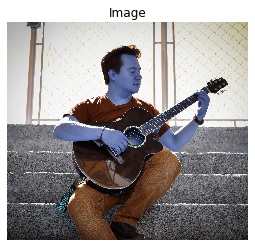

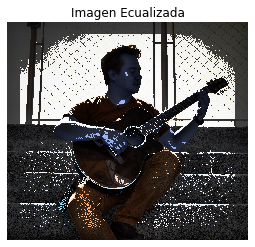

In [9]:

imgName = "./imagenes/guitarrista.JPG"    
#imgGuitarrista = cv2.imread(imgName,mode='RGB')
imgGuitarrista = cv2.imread(imgName)

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(imgGuitarrista, clip_limit=0.01)

# Compare the original image to the equalized
show_image(imgGuitarrista)
show_image(adapthist_eq_image, 'Imagen Ecualizada')

# Solución para la corrección del color :D :D
CV2 al cargar la imagen lo realiza con el orden de colores **BGR** por lo tanto hay que ordenarlos a **RGB** con otra instrucción y listo!!!

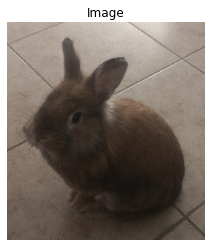

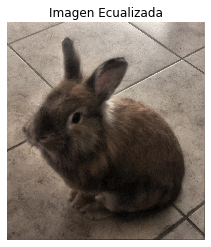

In [10]:
# Import the necessary modules
from skimage import exposure
import cv2

imgName = "./imagenes/conejo.jpg"    
imgGuitarrista = cv2.imread(imgName)
imgGuitarristaRGB = cv2.cvtColor(imgGuitarrista, cv2.COLOR_BGR2RGB)

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(imgGuitarristaRGB, clip_limit=0.0085)

# Compare the original image to the equalized
show_image(imgGuitarristaRGB)
show_image(adapthist_eq_image, 'Imagen Ecualizada')

# Transformaciones
Cuando se trabaja con imágenes, frecuentemente es necesario cambiar el tamaño, hacer rotaciones u otras transformaciones.  
Dichas actividades sirven para tener un tamaño estándar de imagenes y luego enviarlas a un modelo de Machine Learning para su entrenamiento o bien, para ocupar menos espacio, para corregir alineaciones, guardar imagenes con la misma proporción, etc.

## Rotación

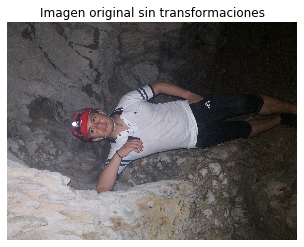

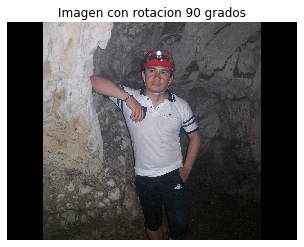

In [11]:
#from skimage,skimage.transform import exposure,rotate
from skimage.transform import rotate, rescale
import cv2

imgName = "./imagenes/cuevaConRotacion.jpg"    
imgCuevaRotacion = cv2.imread(imgName)
imgCuevaRotacionRGB = cv2.cvtColor(imgCuevaRotacion, cv2.COLOR_BGR2RGB)

show_image(imgCuevaRotacionRGB, "Imagen original sin transformaciones")

# Rotate the image 90 degrees clockwise 
imgRotarCuevaRotacionRGB = rotate(imgCuevaRotacionRGB, -90)
show_image(imgRotarCuevaRotacionRGB, "Imagen con rotacion 90 grados")



## Re escalar: Reducir tamaño 4 veces
Observar que el tamaño de la imagen cambia.  
Al aplicar **Anti_alising** la imagen no sufre tanta perdida de detalles, se ven menos pixeles afectados

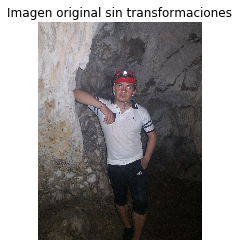

Dimensiones de imagen: original (3968, 2976, 3)


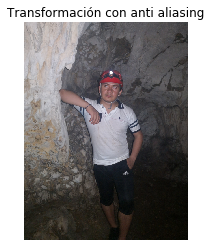

Dimensiones de imagen: CON anti aliasing (992, 744, 3)


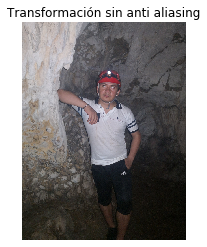

Dimensiones de imagen: SIN anti aliasing (992, 744, 3)


In [12]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

imgName = "./imagenes/cueva.jpg"    
imgCueva = cv2.imread(imgName)
imgCuevaRGB = cv2.cvtColor(imgCueva, cv2.COLOR_BGR2RGB)

############ REESCALAR #####################

# Rescale with anti aliasing
imgCuevaRGBconAntialisadoTrue = rescale(imgCuevaRGB, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
imgCuevaRGBconAntialisadoFalse = rescale(imgCuevaRGB, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(imgCuevaRGB, "Imagen original sin transformaciones")
print("Dimensiones de imagen: original", imgCuevaRGB.shape)
show_image(imgCuevaRGBconAntialisadoTrue, "Transformación con anti aliasing")
print("Dimensiones de imagen: CON anti aliasing", imgCuevaRGBconAntialisadoTrue.shape)
show_image(imgCuevaRGBconAntialisadoFalse, "Transformación sin anti aliasing")
print("Dimensiones de imagen: SIN anti aliasing", imgCuevaRGBconAntialisadoFalse.shape)

## Re escalar: Aumentar el tamaño 4 veces
Observar que por utilizar "Anti_aliasing" no se pierden pixeles

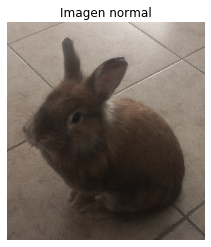

Dimensiones:  (1825, 1654, 3)


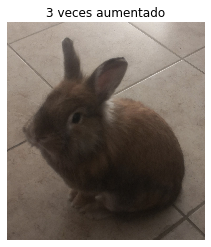

Dimensiones:  (7300, 6616, 3)


In [13]:
# Import the module and function to enlarge images
from skimage.transform import resize, rescale

imgName = "./imagenes/conejo.jpg"    
imgConejo = cv2.imread(imgName)
imgConejoRGB = cv2.cvtColor(imgConejo, cv2.COLOR_BGR2RGB)



# Enlarge the image so it is 3 times bigger
imgConejoX4 = rescale(imgConejoRGB, 4, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(imgConejoRGB, "Imagen normal")
print("Dimensiones: ",imgConejoRGB.shape)
show_image(imgConejoX4, "3 veces aumentado")
print("Dimensiones: ",imgConejoX4.shape)

**Observación:**

Tomar en cuenta que también se puede modificar el tamaño de una imagen en base a su altura y anchura, similar a utilizar:  
height = int(imagen.shape[0] / 2)  
width = int(imagen.shape[1] / 2)  

image_resized = resize(imagen, (height, width),anti_aliasing=True)  
                       
Al realizarlo de esta forma, pueden quedar valores no proporcionales.

Dicha división de la imagen, es prácticamente una compresión sin perder calidad del contenido si se utiliza anti-aliasing ya que el archivo ocupará menos espacio en kb, sirve para subirlas a blogs, paginas web, portales, etc.
                       




## Morfología
La morfología en una imágen sirve para identificar objetos por medio de una técnica llamada binarización.  
Por ejemplo, si se tiene una imágen en la cual se desea identificar un objeto, primero debe convertirse a escala de blanco y negro (binarización), luego aplicar cualquiera de los métodos de:  
+ Dilatación:
Agrega pixeles similares en las orillas del objeto detectado.
+ Erosión:
Quita pixeles similares en las orillas del objeto detectado.  
Ambas técnicas utilizan matrices que se conocen como *filtros* para aplicar la modificación, por ejemplo:  

A=  
[ 0 1 0 ]  
[ 1 1 1 ]  
[ 0 1 0 ]  
  
  
Para aplicar dichos filtros es necesario definir las matrices, por ejemplo:

selem = rectangle(12,6)

Se utiliza la función binaria: **binary_erosion** con la matriz como parámetro, ejemplo: 
\# Obtain the erosed image with binary erosion
eroded_image = morphology.binary_erosion(image_horse, selem=selem)  

En caso no se especifique la matriz de parámetro, se aplicará una matriz default, como en los ejemplos que se verán mas adelante.  

Uno de los usos frecuentes son:
+ Reconocimiento de letras (OCR)
+ Reconocimiento de animales u objetos



### Morfolofía: Operación Erosión
Se requiere que la imagen sea de un solo canal, para mejor visibilidad, se ha pasado de sus colores naturales RGB a GRIS, y posterior a eso, se binariza en blanco y negro para finalmente aplicar la erosión.

Dimensiones de imagen gris desde RGB:  (866, 1280)
Dimensiones de imagen binaria en relación a gris RGB:  (866, 1280)
Valor Thresh para imagen binaria:  0.5294259382659314


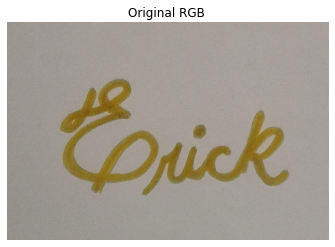

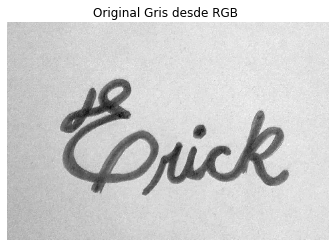

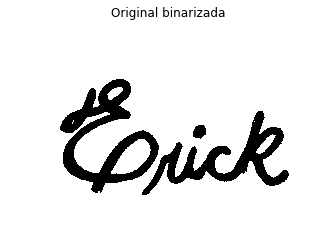

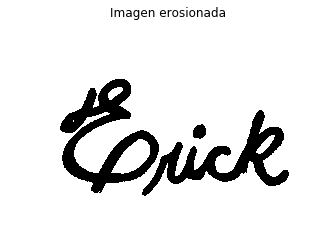

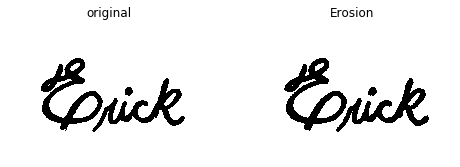

In [14]:
# Import the morphology module
from skimage import morphology, color
from skimage.filters import threshold_otsu

imgName = "./imagenes/nombre.jpg"    
imgPalabra = cv2.imread(imgName)
imgPalabraRGB = cv2.cvtColor(imgPalabra, cv2.COLOR_BGR2RGB)
imgPalabraRGBGris = color.rgb2gray(imgPalabraRGB)


### Pasar a imagen binaria
valorThresh = threshold_otsu(imgPalabraRGBGris)
imgPalabraBinarizado = imgPalabraRGBGris > valorThresh


print("Dimensiones de imagen gris desde RGB: ",imgPalabraRGBGris.shape)
print("Dimensiones de imagen binaria en relación a gris RGB: ",imgPalabraBinarizado.shape)
print("Valor Thresh para imagen binaria: ", valorThresh)


#show_image(imgConejoGris)
 
# Obtain the eroded shape 
imagenBinariaErosionada = morphology.binary_erosion(imgPalabraBinarizado) 

# See results
show_image(imgPalabraRGB, 'Original RGB ')
show_image(imgPalabraRGBGris, 'Original Gris desde RGB ')
show_image(imgPalabraBinarizado, 'Original binarizada')
show_image(imagenBinariaErosionada, 'Imagen erosionada')

plot_comparison(imgPalabraBinarizado, imagenBinariaErosionada, 'Erosion')



### Morfología: Operación Dilatación
Se requiere que la imagen sea de un solo canal, para mejor visibilidad, se ha pasado de sus colores naturales RGB a GRIS, y posterior a eso, se binariza en blanco y negro para finalmente aplicar la Dilatación.

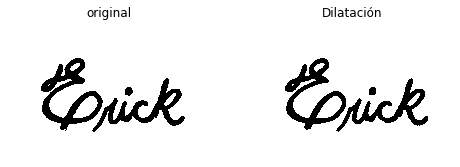

In [15]:
# Import the morphology module
from skimage import morphology, color
from skimage.filters import threshold_otsu

imgName = "./imagenes/nombre.jpg"    
imgPalabra = cv2.imread(imgName)
imgPalabraRGB = cv2.cvtColor(imgPalabra, cv2.COLOR_BGR2RGB)
imgPalabraRGBGris = color.rgb2gray(imgPalabraRGB)


### Pasar a imagen binaria
valorThresh = threshold_otsu(imgPalabraRGBGris)
imgPalabraBinarizado = imgPalabraRGBGris > valorThresh

 
# Obtain the eroded shape 
imagenBinariaDilatada = morphology.binary_dilation(imgPalabraBinarizado) 

# See results


plot_comparison(imgPalabraBinarizado, imagenBinariaDilatada, 'Dilatación')


## Si se quieren utilizar matrices especificas:
Erosión

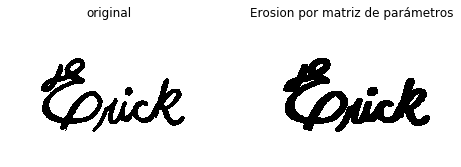

In [16]:
rectangle = morphology.rectangle(3, 19)
#rectangle = morphology.square(3)

eroded_image = morphology.binary_erosion(imgPalabraBinarizado, selem=rectangle)
plot_comparison(imgPalabraBinarizado, eroded_image, 'Erosion por matriz de parámetros')



Dilatación:


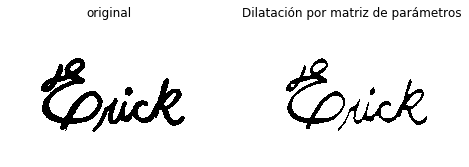

In [17]:
rectangle = morphology.rectangle(3, 19)
#rectangle = morphology.square(3)

imagenDilatada = morphology.binary_dilation(imgPalabraBinarizado, selem=rectangle)
plot_comparison(imgPalabraBinarizado, imagenDilatada, 'Dilatación por matriz de parámetros')

